<a href="https://colab.research.google.com/github/swapnil2009/PyCBC/blob/master/Graduation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression




## Assignment 🌯

Using a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/), build a model that predicts whether a burrito is rated `'Great'`?

## What We Want

The purpose of this assignment is to give us an idea of how you approach a data science problem and whether you mastered some of the skills that you learned in Fullstack Bootcamp. Please  explain your approach. 

## What You Need to Do

- [ ] Make a copy of this notebook to work on - you can download if you have a local Jupyter setup, or click `File > Save a copy in Drive` to copy and work on with Google Colab
- [ ] Import the burrito `csv` file into a `DataFrame`. Your target will be the `'Great'` column.
- [ ] Conduct exploratory data analysis (EDA) to determine how you should clean the data for your pipeline.
- [ ] Clean your data. (Note: You are not required to use all columns in your model, but justify your decisions based on your EDA.)
- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Determine what the baseline accuracy is for a naïve classification model.
- [ ] Create a `scikit-learn` pipeline with the following components:
  - A one hot encoder for categorical features.
  - A scaler.
  - A logistic regressor.
- [ ] Train your model using the training data.
- [ ] Create a visualization showing your model's coefficients.
- [ ] Get your model's validation accuracy (multiple times if you try multiple iterations).
- [ ] Get your model's test accuracy (one time, at the end).

---



In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
### Import the burrito `csv` file

# Import Data
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1cctPq1sYeD6Y6mGg5Lpl-GLDJBwtdihg')

In [3]:
### Conduct exploratory data analysis (EDA)

In [4]:
df.head(60)

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
5,Pollos Maria,combo chicken,1/28/2016,NaN,NaN,NaN,NaN,NaN,NaN,6.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,Nico's Taco Shop,California,1/30/2016,Carmel Valley,3860 Valley Centre Dr #404,http://www.yelp.com/biz/nicos-taco-shop-san-diego,3.0,2.9,NaN,7.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
7,Nico's Taco Shop,Carnitas,1/30/2016,NaN,NaN,NaN,NaN,NaN,NaN,6.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,Los Primos Mexican Food,Monster California,2/1/2016,UTC,7770 Regents Rd,http://www.primosmex.com/,3.0,3.7,x,9.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9,JV's Mexican Food,Carne Asada,2/6/2016,Morena,1112 Morena Blvd,http://jvsmexfood.com/,4.0,4.1,NaN,6.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [5]:
df

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,Valentine's Mexican Food,Al Pastor,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
417,Valentine's Mexican Food,Chile Relleno,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
418,Valentine's Mexican Food,California,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
419,Valentine's Mexican Food,Shrimp,8/27/2019,NaN,NaN,NaN,NaN,NaN,NaN,7.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [6]:
df.isnull().sum().head(60)

Location            0
Burrito             0
Date                0
Neighborhood      329
Address           333
URL               334
Yelp              334
Google            334
Chips             395
Cost                7
Hunger              3
Mass (g)          399
Density (g/mL)    399
Length            138
Circum            140
Volume            140
Tortilla            0
Temp               20
Meat               14
Fillings            3
Meat:filling        9
Uniformity          2
Salsa              25
Synergy             2
Wrap                3
Reviewer            1
Notes             275
Unreliable        388
NonSD             414
Beef              242
Pico              263
Guac              267
Cheese            262
Fries             294
Sour cream        329
Pork              370
Chicken           400
Shrimp            400
Fish              415
Rice              385
Beans             386
Lettuce           410
Tomato            414
Bell peper        414
Carrots           420
Cabbage   

In [7]:
df.columns

Index(['Location', 'Burrito', 'Date', 'Neighborhood', 'Address', 'URL', 'Yelp',
       'Google', 'Chips', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Reviewer',
       'Notes', 'Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese',
       'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice',
       'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage',
       'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
       'Chile relleno', 'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom',
       'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini', 'Great'],
      dtype='object')

In [8]:
#df1.dtypes

In [9]:
df.shape

(421, 65)

In [10]:
df1=df.dropna(axis=1, thresh=400)

In [11]:
df.dropna()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great


In [12]:
df1.head(60)

,Location,Burrito,Date,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Synergy,Wrap,Reviewer,Great
0,Donato's taco shop,California,1/18/2016,6.49,3.00,3.00,5.0,3.00,3.50,4.0,4.0,4.0,4.0,Scott,False
1,Oscar's Mexican food,California,1/24/2016,5.45,3.50,2.00,3.5,2.50,2.50,2.0,4.0,2.5,5.0,Scott,False
2,Oscar's Mexican food,Carnitas,1/24/2016,4.85,1.50,3.00,2.0,2.50,3.00,4.5,4.0,3.0,5.0,Emily,False
3,Oscar's Mexican food,Carne asada,1/24/2016,5.25,2.00,3.00,2.0,3.50,3.00,4.0,5.0,4.0,5.0,Ricardo,False
4,Pollos Maria,California,1/27/2016,6.59,4.00,4.00,5.0,4.00,3.50,4.5,5.0,4.5,4.0,Scott,True
5,Pollos Maria,combo chicken,1/28/2016,6.99,4.00,3.00,4.0,5.00,3.50,2.5,2.5,4.0,1.0,Emily,False
6,Nico's Taco Shop,California,1/30/2016,7.19,1.50,2.00,3.0,3.00,2.00,2.5,2.5,2.0,3.0,Scott,False
7,Nico's Taco Shop,Carnitas,1/30/2016,6.99,4.00,2.50,3.0,3.00,2.50,3.0,3.5,2.5,3.0,Emily,False
8,Los Primos Mexican Food,Monster California,2/1/2016,9.25,3.50,2.00,4.5,4.50,3.50,1.5,3.0,4.0,2.0,Scott,False
9,JV's Mexican Food,Carne Asada,2/6/2016,6.25,3.50,2.50,1.5,1.50,3.00,4.5,3.0,2.0,4.5,Scott,False


In [13]:
X=df1.drop("Great",axis=1)

In [14]:
X['Burrito'].value_counts().head(20)

California                   101
Carne asada                   29
California                    26
Carnitas                      23
Local                         14
Surf & Turf                   14
California Everything         13
Al pastor                      9
Adobada                        9
Surfin California              8
Custom                         5
Holy Moly                      5
Carne asada everything         4
Shrimp                         3
Chile Relleno                  3
California everything          3
Pollo asado                    3
Pastor                         3
California - Pork Adobada      3
Fish                           3
Name: Burrito, dtype: int64

In [15]:
import numpy as np

for i in range(len(X['Burrito'])):
  if X['Burrito'].iloc[i].__eq__('California '):
    X['Burrito'].iloc[i]=X['Burrito'].iloc[i].strip()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
X['Burrito'].value_counts().head(20)

California                   127
Carne asada                   29
Carnitas                      23
Local                         14
Surf & Turf                   14
California Everything         13
Al pastor                      9
Adobada                        9
Surfin California              8
Custom                         5
Holy Moly                      5
Carne asada everything         4
Shrimp                         3
Chile Relleno                  3
California everything          3
Pollo asado                    3
Pastor                         3
California - Pork Adobada      3
Fish                           3
Al Pastor                      3
Name: Burrito, dtype: int64

In [17]:
y=df1.Great

In [18]:
y

0      False
1      False
2      False
3      False
4       True
       ...  
416    False
417     True
418    False
419     True
420     True
Name: Great, Length: 421, dtype: bool

In [19]:
from functools import partial
f = partial(pd.to_datetime, dayfirst=True)

In [20]:

#X[(X['Date']<f("1/01/2017"))]
X['Date']=pd.to_datetime(X['Date'])

X_train=X[X['Date']<'2017-01-01']

In [21]:
y_train=y[X['Date']<'2017-01-01']

In [22]:
y_train.mean()

0.40939597315436244

In [23]:
X_train

,Location,Burrito,Date,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Synergy,Wrap,Reviewer
0,Donato's taco shop,California,2016-01-18,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,Scott
1,Oscar's Mexican food,California,2016-01-24,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,2.5,5.0,Scott
2,Oscar's Mexican food,Carnitas,2016-01-24,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,5.0,Emily
3,Oscar's Mexican food,Carne asada,2016-01-24,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,5.0,Ricardo
4,Pollos Maria,California,2016-01-27,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,4.5,4.0,Scott
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Gloria's Taco Shop,California,2016-12-02,5.65,3.0,4.0,1.5,2.0,3.0,4.2,4.0,2.0,4.5,Scott
295,Gloria's Taco Shop,Cabeza,2016-12-02,5.49,3.0,4.5,5.0,2.0,2.0,2.5,3.5,2.5,3.0,Richard
296,Mr. Ruribertos Taco Shop,California,2016-12-10,7.75,4.0,3.5,2.5,3.0,3.3,1.4,2.3,3.3,4.5,Scott
297,Mr. Ruribertos Taco Shop,Carne asada,2016-12-10,7.75,4.0,4.0,4.5,2.0,2.0,3.5,3.5,2.0,4.0,Brent


In [24]:
X_valid=X[(X['Date']<'2018-01-01')& (X['Date']>'2016-12-31')]

In [25]:
y_valid=y[(X['Date']<'2018-01-01')& (X['Date']>'2016-12-31')]

In [26]:
y_valid.mean()

0.4470588235294118

In [27]:
X_valid

,Location,Burrito,Date,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Synergy,Wrap,Reviewer
299,Rigoberto's Taco Shop,California,2017-01-04,6.60,NaN,4.0,4.5,4.0,3.5,3.5,5.0,3.50,4.5,Scott
300,Rigoberto's Taco Shop,Chile Relleno,2017-01-04,6.60,NaN,4.0,2.0,NaN,4.0,NaN,4.6,3.75,5.0,Sage
301,Los Tacos,Fusion,2017-01-07,8.50,3.9,3.0,4.5,4.1,3.0,3.7,4.0,4.20,5.0,Scott
302,Los Tacos,Local,2017-01-07,7.90,4.0,3.5,4.0,4.0,3.0,4.0,4.5,3.80,4.8,Emily
303,Taco Villa,Chicken,2017-01-10,4.99,3.5,2.5,4.5,3.0,2.5,3.0,3.0,2.00,4.0,Scott
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Rigoberto's Taco Shop,California,2017-09-05,6.85,3.5,3.0,4.5,3.8,3.8,4.0,3.5,4.00,3.0,Scott
380,Rigoberto's Taco Shop,California,2017-09-05,6.85,3.5,3.0,4.5,4.0,4.0,4.5,3.0,4.00,3.5,Sage
381,Burrito Box,Steak with guacamole,2017-12-16,11.50,3.5,2.0,2.0,4.0,3.5,3.0,4.5,4.00,2.0,Scott
382,Taco Stand,California,2017-12-29,7.89,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.30,4.5,Scott


In [28]:
X_test=X[X['Date']>='2018-01-01']

In [29]:
y_test=y[X['Date']>='2018-01-01']

In [30]:
y_test.drop(index=77, inplace=True)

In [31]:
X_test.drop(index=77, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
X_test

,Location,Burrito,Date,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Synergy,Wrap,Reviewer
384,Lolita's Taco Shop,California,2018-01-02,7.25,4.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,5.0,Ben S
385,El Patron,Breakfast,2018-01-09,4.19,3.0,3.0,5.0,2.0,2.0,4.0,1.0,3.0,4.0,Bernie form
386,La Posta de Acapulco,California,2018-01-12,7.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Chris form
387,Los Tacos 2,Local,2018-01-12,8.50,4.0,4.0,4.0,3.0,3.5,1.0,2.0,3.0,1.0,Scott
388,Rigoberto's Taco Shop,Carne asada,2018-04-04,7.20,3.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,Han Mee
389,Taco Villa,Carnitas,2018-04-09,5.99,3.0,3.5,5.0,4.3,3.5,5.0,4.0,3.8,2.0,Scott
390,Taco Villa,Carnitas,2018-04-09,5.99,3.5,4.0,4.5,5.0,4.5,5.0,4.0,4.5,4.0,Nuttida
391,Taco Villa,Carnitas,2018-04-09,5.99,2.0,2.0,3.5,4.5,4.0,4.0,2.0,4.0,2.0,Elynn
392,Mikes Taco Club,California,2018-04-14,8.99,4.0,4.5,4.5,4.0,4.0,3.0,4.0,4.0,3.0,Scott
393,Mikes Taco Club,California,2018-04-14,8.99,4.0,4.5,5.0,3.5,4.0,4.0,4.0,2.5,1.5,Sage


In [33]:
y_test.mean()

0.5675675675675675

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [35]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X_train)
X_train_imp=imputer.transform(X_train)

In [36]:
X_train

,Location,Burrito,Date,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Synergy,Wrap,Reviewer
13,Tony's Fresh Mexican Food,battered fish,2016-02-11,6.99,3.0,3.0,1.0,1.5,2.5,4.0,4.0,4.5,5.0,Nicole
354,Vallarta Express,Surf & Turf,2017-06-24,8.55,3.0,3.0,2.5,3.0,3.0,3.5,2.8,2.8,1.5,Scott
61,Rigoberto's Taco Shop,Surf & Turf,2016-04-07,7.45,3.5,3.0,5.0,3.5,2.5,3.0,2.5,3.0,4.0,Bankole
171,California Burritos,California Everything,2016-08-01,6.25,3.5,3.5,2.0,3.0,3.5,3.5,2.5,3.5,4.5,Scott
341,Rigoberto's Taco Shop,California,2017-05-17,6.85,4.0,3.5,5.0,3.3,3.0,5.0,2.0,3.8,3.5,Scott
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Storehouse Kitchen,Breakfast,2016-10-17,NaN,3.5,4.0,5.0,4.5,4.2,4.7,4.4,4.9,5.0,Sage
72,Vallarta express,California,2016-04-15,6.65,3.5,3.5,NaN,3.5,3.5,4.5,3.5,4.0,4.0,Ricardo
396,Taco Villa,Carnitas,2018-04-20,5.99,3.0,2.0,5.0,4.5,3.5,4.5,4.5,3.5,1.5,Scott
235,El Torrito Foods,Asada,2016-09-25,5.49,4.0,3.0,5.0,3.0,3.0,2.5,4.0,3.0,5.0,Scott


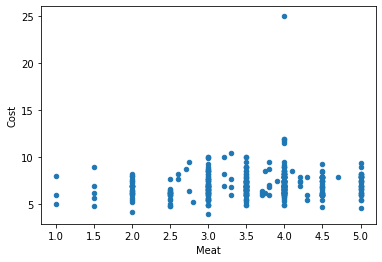

In [37]:
df.plot(kind='scatter',y='Cost',x='Meat')

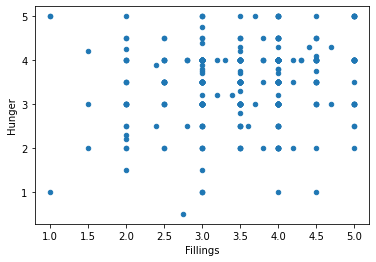

In [38]:
df.plot(kind='scatter',x='Fillings',y='Hunger')

In [39]:
!pip install ipyplot
import ipyplot
import plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [40]:
plt.show
### Clean data

<function matplotlib.pyplot.show>

In [41]:

### Do train/validate/test split

In [42]:
### Determine baseline accuracy for a naïve classification model

In [43]:
### Create a `scikit-learn` pipeline

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn=KNeighborsClassifier(n_neighbors=5)

In [50]:
knn.fit(X_train, y_train)

ValueError: ignored

In [46]:
### Train model using training data

In [47]:
### Create visualization of model coefficients



In [48]:
### Get model's validation accuracy



In [49]:
### Get your model's test accuracy

